In [1]:
import tensorflow as tfl 
import matplotlib.pyplot as plt
import random
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout,Activation,Conv2D,MaxPooling2D,Dense,Flatten
## Dense represents the Fully Connected layer
## DropOut Safes the model from overfitting

## Load the Dataset

In [2]:
dataset = tfl.keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = dataset.load_data()
x_train.shape

(60000, 28, 28)

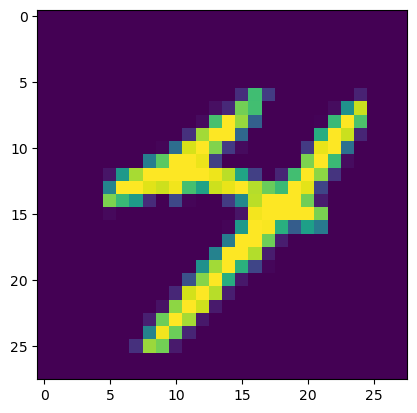

The Label of this data is: 4


In [3]:
idx = random.randint(0 , len(x_train))
plt.imshow(x_train[idx])
plt.show()
print("The Label of this data is: "+ str(y_train[idx]))

In [4]:
## plt.imshow(x_train[1],cmap = plt.cm.binary)

## Normalizing the Data 

In [5]:
x_train = tfl.keras.utils.normalize(x_train,axis=1)
x_test = tfl.keras.utils.normalize(x_test,axis=1)

In [6]:
# plt.imshow(x_train[1],cmap=plt.cm.binary)

In [7]:
# print(y_train[1])

## Reshaping the Data 

In [8]:
IMGSIZE = 28
x_train = np.array(x_train).reshape(-1,IMGSIZE,IMGSIZE,1) ##increasing one dimension for kernel filter
x_test = np.array(x_test).reshape(-1,IMGSIZE,IMGSIZE,1)
print("Training Sample",x_train.shape)
print("Testing Sample",x_test.shape)

Training Sample (60000, 28, 28, 1)
Testing Sample (10000, 28, 28, 1)


In [9]:
### creating neural model
model = Sequential()

##applying convolution 
model.add(Conv2D(64, (3,3), input_shape=(28,28,1))) ##x_train.shape[1:]
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2))) 

model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2))) 

model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2))) 

##Fully Connected Layer
model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

model.add(Dense(32))
model.add(Activation("relu"))

model.add(Dense(10))
model.add(Activation("softmax"))


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 activation (Activation)     (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                   

## Compilation of Model 

In [11]:
###compiling the model
model.compile(loss="sparse_categorical_crossentropy", optimizer='adam', metrics=['accuracy'])

In [12]:
no_of_epochs = 5
history = model.fit(x_train,y_train,epochs=no_of_epochs,validation_split = 0.3,batch_size=64)

Epoch 1/5


657/657 [==============================] - 46s 63ms/step - loss: 0.4105 - accuracy: 0.8709 - val_loss: 0.1716 - val_accuracy: 0.9458
Epoch 2/5
657/657 [==============================] - 39s 59ms/step - loss: 0.1310 - accuracy: 0.9607 - val_loss: 0.1011 - val_accuracy: 0.9686
Epoch 3/5
657/657 [==============================] - 39s 60ms/step - loss: 0.0923 - accuracy: 0.9719 - val_loss: 0.0858 - val_accuracy: 0.9737
Epoch 4/5
657/657 [==============================] - 40s 60ms/step - loss: 0.0753 - accuracy: 0.9761 - val_loss: 0.0763 - val_accuracy: 0.9767
Epoch 5/5
657/657 [==============================] - 38s 58ms/step - loss: 0.0613 - accuracy: 0.9810 - val_loss: 0.0686 - val_accuracy: 0.9782


Text(0.5, 1.0, 'Loss')

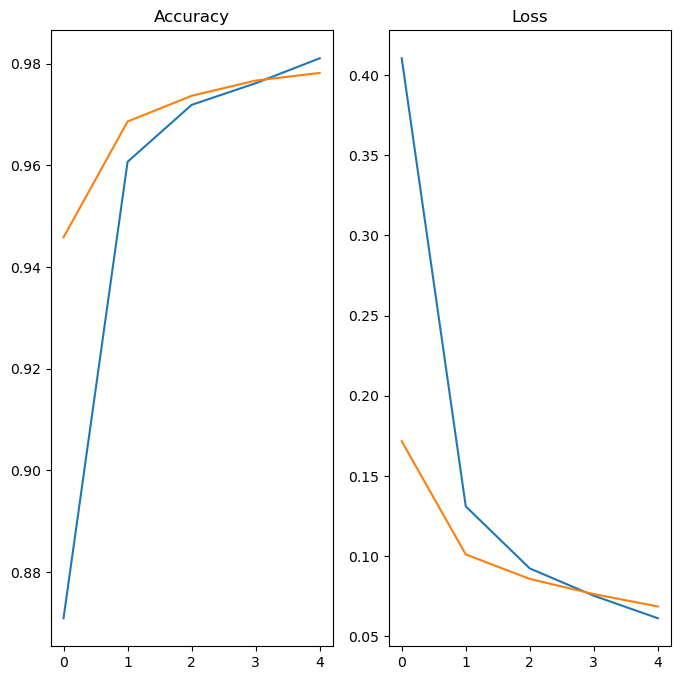

In [13]:
epochs_range = range(no_of_epochs)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'],label = 'Validation Loss')
plt.title('Loss')

## Evaluating Testing on the model

In [14]:
loss, accuracy = model.evaluate(x_test,y_test)

313/313 [==============================] - 4s 11ms/step - loss: 0.0616 - accuracy: 0.9816


In [15]:
print(f"Model Accuracy: {accuracy:.2%}")
print("Model Accuracy: {:.2%}".format(accuracy))
# predictions = model.predict([x_test_r])
# print(np.argmax(predictions[1]))
# plt.imshow(x_test[1])

Model Accuracy: 98.16%
Model Accuracy: 98.16%


## Saving the Model

In [16]:
from tensorflow.keras.models import save_model
import joblib

save_model(model, 'model/my_model.keras')
model.save("model/save_my_model.keras")
joblib.dump(model,"model/save_model_by_joblib.keras")


['model/save_model_by_joblib.keras']

## Load the Model

In [17]:
from tensorflow.keras.models import load_model

model = load_model('model/my_model.keras')
model_by_joblib=joblib.load("model/save_model_by_joblib.keras")


## Making Predictions

1/1 [==============================] - 0s 214ms/step
0


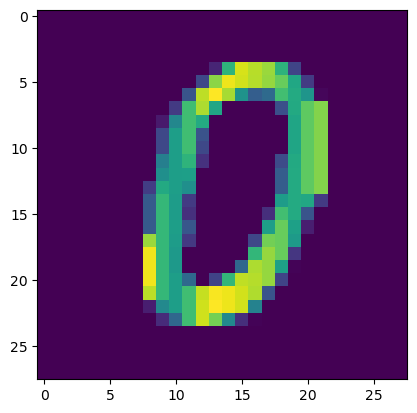

In [18]:
idx2 = random.randint(0,len(x_test))
plt.imshow(x_test[idx2])

pred = model.predict(x_test[idx2].reshape(1,28,28,1))
print(np.argmax(pred))

In [19]:
# !pip list

In [20]:
# import cv2
# import time
# import pyscreenshot as ImageGrab

In [21]:
# #prediction of image drawn in paint
# # import joblib
  
# # model=joblib.load("model/digit_recognizer")
# images_folder="predicting_img/"

# while True:
#     img=ImageGrab.grab(bbox=(60,170,400,500))
#     img.save(images_folder+"img.png")
#     im = cv2.imread(images_folder+"img.png")
#     im_gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
#     im_gray  =cv2.GaussianBlur(im_gray, (15,15), 0)
    
#    #Threshold the image
#     ret, im_th = cv2.threshold(im_gray,100, 255, cv2.THRESH_BINARY)
#     roi = cv2.resize(im_th, (28,28), interpolation  =cv2.INTER_AREA)
#     rows,cols=roi.shape    

#     X = []
# ##  Fill the data array with pixels one by one.
# for i in range(rows):
#     for j in range(cols):
#         k = roi[i,j]
#         if k>100:
#             k=0
#         else:
#             k=1
#         X.append(k)
           
            
# predictions  = model.predict([X])

# print("Prediction:",predictions[0])   
# cv2.putText(im, "Prediction is: "+str(predictions[0]), (20,20), 0, 0.8,(0,255,0),2,cv2.LINE_AA)
# cv2.startWindowThread()
# cv2.namedWindow("Result")
# cv2.imshow("Result",im)
# cv2.waitKey(10000)
# if cv2.waitKey(1)==13: #27 is the ascii value of esc, 13 is the ascii value of enter
#        break
# cv2.destroyAllWindows()